<a href="https://colab.research.google.com/github/Udit-git-acc/Image-Compression-for-Edge-Devices/blob/main/image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Onnx model loading and conversion to .pb model 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
!pip install onnx==1.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for onnx
  Running setup.py clean for onnx
Failed to build onnx
  error: subprocess-exited-with-error
  
  × Running setup.py install for onnx did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for onnx ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> onnx

note: This is an issue with the package mentioned above, not pip.
hint: 

In [ ]:
!pip show onnx


In [ ]:
import onnx
from onnx_tf.backend import prepare

model = onnx.load('/content/drive/MyDrive/enc.onnx')
tf_rep = prepare(model)
tf_rep.export_graph('/content/drive/MyDrive/BINOD SIR PROJECT DC/ENCODER MODEL')

# Enoder Model

In [ ]:
#@title Encoder
encoder_model = models.Sequential()
encoder_model.add(layers.Conv2D(128, (5, 5),strides=(2,2), activation='relu', padding = "same", input_shape=(1024, 768, 3)))
encoder_model.add(layers.Conv2D(128, (3, 3),strides=(2,2), activation='relu', padding = "same"))
encoder_model.add(layers.Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding = "same"))
encoder_model.add(layers.Conv2D(192, (5, 5),strides=(2,2), activation='relu', padding = "same"))
encoder_model.add(layers.Conv2D(192, (5, 5),strides=(2,2), activation='relu', padding = "same"))

encoder_model.compile(optimizer='adagrad',loss="MeanAbsoluteError",metrics="MeanAbsoluteError")
print (encoder_model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 384, 128)     9728      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 192, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 192, 128)     147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 96, 192)      614592    
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 48, 192)       921792    
                                                                 
Total params: 1,841,280
Trainable params: 1,841,280
Non-trainable params: 0
_________________________________________________________________
None


# Decoder Model

In [ ]:
#@title Decoder
decoder_model = models.Sequential()

decoder_model.add(layers.Conv2DTranspose(192, kernel_size=5, strides=2, activation='relu', padding='same', dilation_rate=(1, 1)))
decoder_model.add(layers.Conv2DTranspose(128, kernel_size=5, strides=2, activation='relu', padding='same', dilation_rate=(1, 1)))
decoder_model.add(layers.Conv2DTranspose(128, kernel_size=3, strides=1, activation='relu', padding='same', dilation_rate=(1, 1)))
decoder_model.add(layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same', dilation_rate=(1, 1)))
decoder_model.add(layers.Conv2DTranspose(3,5,strides=2,padding='same',dilation_rate=(1, 1),groups=1,activation='relu',use_bias=True))
decoder_model.build(input_shape=(None, 64, 48, 192))
print (decoder_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 128, 96, 192)     921792    
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 256, 192, 128)    614528    
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 256, 192, 128)    147584    
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 512, 384, 128)    147584    
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 1024, 768, 3)    

#Reading and Visualizing .pb model

# Making model in ONXX


In [ ]:
!pip install onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 99.2 MB/s eta 0:00:00


In [ ]:
import onnx
from onnx import numpy_helper
import numpy as np

# Load the ONNX model
model = onnx.load("/content/drive/MyDrive/BINOD_SIR_PROJECT_DC/ENCODER MODEL/enc (2).onnx")

# Get the weights of the model
weights = {}
for initializer in model.graph.initializer:
    name = initializer.name
    print (name)
    tensor = numpy_helper.to_array(initializer)
    print (tensor.shape)
    weights[name] = tensor

# Print the shape of each weight
for name, tensor in weights.items():
    print(f"{name}: {tensor.shape}")

# # Extract a specific weight
# weight_name = "conv1.weight"
# weight_value = weights[weight_name]
# print(f"{weight_name}: {weight_value}")


g_a.0.weight
(128, 3, 5, 5)
g_a.0.bias
(128,)
g_a.2.weight
(128, 128, 3, 3)
g_a.2.bias
(128,)
g_a.4.weight
(128, 128, 3, 3)
g_a.4.bias
(128,)
g_a.6.weight
(192, 128, 5, 5)
g_a.6.bias
(192,)
g_a.8.weight
(192, 192, 5, 5)
g_a.8.bias
(192,)
g_a.0.weight: (128, 3, 5, 5)
g_a.0.bias: (128,)
g_a.2.weight: (128, 128, 3, 3)
g_a.2.bias: (128,)
g_a.4.weight: (128, 128, 3, 3)
g_a.4.bias: (128,)
g_a.6.weight: (192, 128, 5, 5)
g_a.6.bias: (192,)
g_a.8.weight: (192, 192, 5, 5)
g_a.8.bias: (192,)


In [ ]:
import numpy as np
from keras import backend as K

layer_count = 0
for layer in encoder_model.layers:
    print (layer)
    pretrained_weights = weights["g_a."+str(2*layer_count)+".weight"]
    pretrained_bias = weights["g_a."+str(2*layer_count)+".bias"]

    initial_weights = layer.get_weights()

    print(np.array(initial_weights[0]).shape)
    print(np.array(initial_weights[1]).shape)

    new_weights = np.array(pretrained_weights)
    new_weights = np.transpose(new_weights, (2, 3, 1, 0))


    new_bias = np.array(pretrained_bias)
    print (new_bias.shape)
    
    # layer.set_weights([new_weights, initial_weights[1]])
    K.set_value(layer.weights[0], new_weights)
    #layer.set_weights([new_bias, initial_weights[0]])
    K.set_value(layer.weights[1], new_bias)

    #Verify if the weights are updated
    updated_weights = layer.get_weights()
    print(np.allclose(updated_weights[0], new_weights))
    print(np.allclose(updated_weights[1], new_bias))

    layer_count += 1

(5, 5, 3, 128)
(128,)
(128,)
True
True
(3, 3, 128, 128)
(128,)
(128,)
True
True
(3, 3, 128, 128)
(128,)
(128,)
True
True
(5, 5, 128, 192)
(192,)
(192,)
True
True
(5, 5, 192, 192)
(192,)
(192,)
True
True


In [ ]:
#Saving encoder model
encoder_model.save("encoder_model")

In [ ]:
import onnx
from onnx import numpy_helper
import numpy as np

# Load the ONNX model
model = onnx.load("/content/drive/MyDrive/BINOD_SIR_PROJECT_DC/DECODER MODEL/dec (1).onnx")

# Get the weights of the model
weights = {}
for initializer in model.graph.initializer:
    name = initializer.name
    print (name)
    tensor = numpy_helper.to_array(initializer)
    print (tensor.shape)
    weights[name] = tensor

# Print the shape of each weight
for name, tensor in weights.items():
    print(f"{name}: {tensor.shape}")


g_s.0.weight
(192, 192, 5, 5)
g_s.0.bias
(192,)
g_s.2.weight
(192, 128, 5, 5)
g_s.2.bias
(128,)
g_s.4.weight
(128, 128, 3, 3)
g_s.4.bias
(128,)
g_s.6.weight
(128, 128, 3, 3)
g_s.6.bias
(128,)
g_s.8.weight
(128, 3, 5, 5)
g_s.8.bias
(3,)
g_s.0.weight: (192, 192, 5, 5)
g_s.0.bias: (192,)
g_s.2.weight: (192, 128, 5, 5)
g_s.2.bias: (128,)
g_s.4.weight: (128, 128, 3, 3)
g_s.4.bias: (128,)
g_s.6.weight: (128, 128, 3, 3)
g_s.6.bias: (128,)
g_s.8.weight: (128, 3, 5, 5)
g_s.8.bias: (3,)


In [ ]:
import numpy as np
from keras import backend as K

layer_count = 0
for layer in decoder_model.layers:
    print (layer)
    pretrained_weights = weights["g_s."+str(2*layer_count)+".weight"]
    pretrained_bias = weights["g_s."+str(2*layer_count)+".bias"]

    initial_weights = layer.get_weights()

    print(np.array(initial_weights[0]).shape)
    print(np.array(initial_weights[1]).shape)

    new_weights = np.array(pretrained_weights)
    new_weights = np.transpose(new_weights, (2, 3, 1, 0))


    new_bias = np.array(pretrained_bias)
    print (new_bias.shape)
    
    # layer.set_weights([new_weights, initial_weights[1]])
    K.set_value(layer.weights[0], new_weights)
    #layer.set_weights([new_bias, initial_weights[0]])
    K.set_value(layer.weights[1], new_bias)

    #Verify if the weights are updated
    updated_weights = layer.get_weights()
    print(np.allclose(updated_weights[0], new_weights))
    print(np.allclose(updated_weights[1], new_bias))

    layer_count += 1

(5, 5, 192, 192)
(192,)
(192,)
True
True
(5, 5, 128, 192)
(128,)
(128,)
True
True
(3, 3, 128, 128)
(128,)
(128,)
True
True
(3, 3, 128, 128)
(128,)
(128,)
True
True
(5, 5, 3, 128)
(3,)
(3,)
True
True


In [ ]:
decoder_model.save("decoder_model")

In [ ]:
 !zip -r encoder.zip /content/encoder_model
 !zip -r decoder.zip /content/decoder_model

  adding: content/encoder_model/ (stored 0%)
  adding: content/encoder_model/variables/ (stored 0%)
  adding: content/encoder_model/variables/variables.index (deflated 58%)
  adding: content/encoder_model/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/encoder_model/assets/ (stored 0%)
  adding: content/encoder_model/saved_model.pb (deflated 89%)
  adding: content/encoder_model/keras_metadata.pb (deflated 91%)
  adding: content/encoder_model/fingerprint.pb (stored 0%)
  adding: content/decoder_model/ (stored 0%)
  adding: content/decoder_model/variables/ (stored 0%)
  adding: content/decoder_model/variables/variables.index (deflated 56%)
  adding: content/decoder_model/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/decoder_model/assets/ (stored 0%)
  adding: content/decoder_model/saved_model.pb (deflated 91%)
  adding: content/decoder_model/keras_metadata.pb (deflated 93%)
  adding: content/decoder_model/fingerprint.pb (stored 0%)


In [ ]:
input_img = tf.keras.layers.Input(shape=(1024, 768, 3))
encoded = encoder_model(input_img)
decoded = decoder_model(encoded)

# Create the autoencoder model by chaining the encoder and decoder
autoencoder = tf.keras.Model(inputs=input_img, outputs=decoded)

autoencoder.save("autoencoder")

In [ ]:
!zip -r autoencoder.zip /content/autoencoder/

  adding: content/autoencoder/ (stored 0%)
  adding: content/autoencoder/variables/ (stored 0%)
  adding: content/autoencoder/variables/variables.index (deflated 62%)
  adding: content/autoencoder/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/autoencoder/assets/ (stored 0%)
  adding: content/autoencoder/saved_model.pb (deflated 91%)
  adding: content/autoencoder/keras_metadata.pb (deflated 95%)
  adding: content/autoencoder/fingerprint.pb (stored 0%)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the JPEG image using PIL
img = Image.open("/content/images (1).jpeg")

# Convert the PIL image to a numpy array
img_array = np.array(img, dtype="float32")

# Rescale the pixel values to the range [0, 1]
img_array = img_array/255.0

# Reshape the image to a 4D tensor for input to the model
img_array = np.reshape(img_array, (1, img_array.shape[1], img_array.shape[0], img_array.shape[2]))

# Get the reconstructed image from the autoencoder model
reconstructed_img = autoencoder(img_array)

# Reshape the reconstructed image to a 2D array for display
reconstructed_img = np.reshape(reconstructed_img, (reconstructed_img.shape[1], reconstructed_img.shape[2], reconstructed_img.shape[3]))

# Plot the original image and the reconstructed image side-by-side
plt.subplot(1, 2, 1)
plt.imshow(img_array[0])
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')
plt.show()


ValueError: ignored

# Task 2

In [ ]:
import cv2
import os

cap = cv2.VideoCapture('/content/1024x768.mp4')

if not cap.isOpened():
    print('Error opening video file')

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f'Frame count: {frame_count}, FPS: {fps}, Width: {width}, Height: {height}')

for i in range(5149, frame_count):
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    if ret:
        filename = f'frame_{i:04d}.jpg'  # use a zero-padded four-digit frame index as the filename
        directory = "/content/drive/MyDrive/BINOD SIR PROJECT DC/dataset"
        os.chdir(directory)
        cv2.imwrite(filename, frame)
    else:
        print(f'Error reading frame {i}')

cap.release()


In [ ]:
encoder_model = models.Sequential()
encoder_model.add(layers.Conv2D(128, (5, 5),strides=(2,2), activation='relu', padding = "same", input_shape=(1024, 768, 3)))
encoder_model.add(layers.Conv2D(128, (5, 5),strides=(2,2), activation='relu', padding = "same"))
encoder_model.add(layers.Conv2D(128, (5, 5),strides=(1,1), activation='relu', padding = "same"))
encoder_model.add(layers.Conv2D(192, (5, 5),strides=(2,2), activation='relu', padding = "same"))
encoder_model.add(layers.Conv2D(192, (5, 5),strides=(2,2), activation='relu', padding = "same"))

encoder_model.compile(optimizer='adagrad',loss="MeanAbsoluteError",metrics="MeanAbsoluteError")
print (encoder_model.summary())


decoder_model = models.Sequential()
decoder_model.add(layers.Conv2DTranspose(192, kernel_size=5, strides=2, activation='relu', padding='same', dilation_rate=(1, 1)))
decoder_model.add(layers.Conv2DTranspose(128, kernel_size=5, strides=2, activation='relu', padding='same', dilation_rate=(1, 1)))
decoder_model.add(layers.Conv2DTranspose(128, kernel_size=5, strides=1, activation='relu', padding='same', dilation_rate=(1, 1)))
decoder_model.add(layers.Conv2DTranspose(128, kernel_size=5, strides=2, activation='relu', padding='same', dilation_rate=(1, 1)))
decoder_model.add(layers.Conv2DTranspose(3,5,strides=2,padding='same',dilation_rate=(1, 1),groups=1,activation='relu',use_bias=True))
decoder_model.build(input_shape=(None, 64, 48, 192))

decoder_model.compile(optimizer='adagrad',loss="MeanAbsoluteError",metrics="MeanAbsoluteError")
print (decoder_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 512, 384, 128)     9728      
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 192, 128)     409728    
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 192, 128)     409728    
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 96, 192)      614592    
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 48, 192)       921792    
                                                                 
Total params: 2,365,568
Trainable params: 2,365,568
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_3"
_________________

In [ ]:
input_img = tf.keras.layers.Input(shape=(1024, 768, 3))
encoded = encoder_model(input_img)
decoded = decoder_model(encoded)

autoencoder = tf.keras.Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

In [ ]:
autoencoder = tf.saved_model.load("/content/drive/MyDrive/BINOD_SIR_PROJECT_DC/model_epoch=5_loss=mae")

In [ ]:
import os
import shutil

for i in os.listdir("/content/drive/MyDrive/BINOD_SIR_PROJECT_DC/dataset"):
    path = "/content/drive/MyDrive/BINOD_SIR_PROJECT_DC/dataset/" + str(i)
    shutil.copy(path, "/content/drive/MyDrive/BINOD_SIR_PROJECT_DC/dataset 2")

In [ ]:
import tensorflow as tf
import os

# Define the directory containing the images
data_dir = '/content/drive/MyDrive/BINOD_SIR_PROJECT_DC/images/dataset'

# Define the batch size and image size
batch_size = 32
img_size = (1024, 768)

# Create a dataset from the directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=batch_size,
    image_size=img_size)

autoencoder.fit(dataset, epochs=2)

Found 0 files belonging to 0 classes.


ValueError: ignored

In [ ]:
import tensorflow as tf
import os

# Set the data path
data_path = "/content/drive/MyDrive/BINOD_SIR_PROJECT_DC/images/dataset"

# Define some parameters for the data loader
batch_size = 32
img_height = 1024
img_width = 768

# Create a list of all image file paths in the data path
img_paths = [os.path.join(data_path, fname) for fname in os.listdir(data_path) if fname.endswith('.jpg')]

# Create a TensorFlow Dataset from the image file paths
img_dataset = tf.data.Dataset.from_tensor_slices(img_paths)

# Define a function to load and preprocess each image
def load_and_preprocess_img(img_path):
    # Load the image
    img = tf.io.read_file(img_path)
    # Decode the image to a tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # Resize the image to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # Normalize the pixel values to be between 0 and 1
    img = tf.cast(img, tf.float32) / 255.0
    # Return the preprocessed image
    return img

# Map the load_and_preprocess_img function to each image in the dataset
img_dataset = img_dataset.map(load_and_preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch the dataset
img_dataset = img_dataset.shuffle(buffer_size=len(img_paths)).batch(batch_size)

# Prefetch the dataset to improve performance
img_dataset = img_dataset.prefetch(tf.data.AUTOTUNE)

autoencoder.fit(img_dataset, epochs=2)
# Print the first batch of images to verify that the data loader is working correctly
# for batch in img_dataset.take(1):
#     print(batch.shape)


Epoch 1/2


ValueError: ignored

In [ ]:
import glob
data_path = "/content/drive/MyDrive/BINOD_SIR_PROJECT_DC/images/dataset"

file_paths = glob.glob(data_path + '/*.jpg')
batch_size = 16
def read_image(file_path):
    image = tf.io.read_file(file_path)
    return image

def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, (1024, 768))
    return image, image  # duplicate the image to use as both input and target

img_dataset = tf.data.Dataset.list_files(file_paths)
img_dataset = img_dataset.map(read_image, num_parallel_calls=tf.data.AUTOTUNE)
img_dataset = img_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
img_dataset = img_dataset.batch(batch_size)
img_dataset = img_dataset.prefetch(tf.data.AUTOTUNE)


In [ ]:
autoencoder.fit(img_dataset, epochs=5)

Epoch 1/5
659/659 [==============================] - 1689s 2s/step - loss: 0.1224 - accuracy: 0.7034
Epoch 2/5
659/659 [==============================] - 1451s 2s/step - loss: 0.0697 - accuracy: 0.7410
Epoch 3/5
659/659 [==============================] - 1451s 2s/step - loss: 0.0636 - accuracy: 0.7551
Epoch 4/5
659/659 [==============================] - 1454s 2s/step - loss: 0.0399 - accuracy: 0.8481
Epoch 5/5
659/659 [==============================] - 1456s 2s/step - loss: 0.0338 - accuracy: 0.8746


In [ ]:
autoencoder.save("/content/drive/MyDrive/BINOD_SIR_PROJECT_DC/model_epoch=5_loss=mae")

Decoded image shape: (1, 1024, 768, 3)


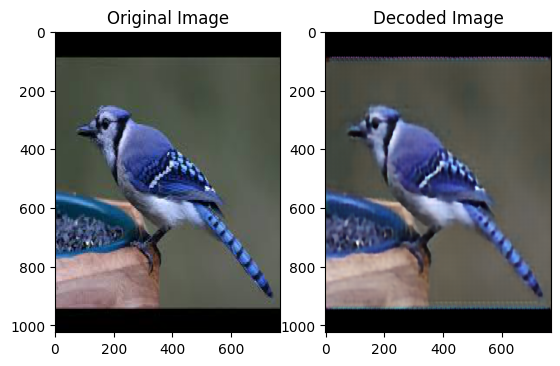

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load your trained autoencoder model
# model = tf.keras.models.load_model('path/to/your/model')

# Load your test image
image_path = '/content/images (1).jpeg'  # Replace this with the path to your image
image = load_img(image_path, target_size=(1024, 768))  # Resize the image to match the input size of your model
image = img_to_array(image) / 255.0  # Convert the image to a numpy array and normalize the pixel values

# Reshape the image to match the expected input shape of your model
image = np.expand_dims(image, axis=0)

# Generate encoded and decoded images
decoded_image = autoencoder(image)

# Check the output shapes
# print('Encoded image shape:', encoded_image.shape)
print('Decoded image shape:', decoded_image.shape)

# Display the original and decoded images
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(image[0])
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(decoded_image[0])
plt.title('Decoded Image')

plt.show()
